In [2]:
from numba_code import run_numba
from cupy_code import run_cupy
from torch_code import run_torch 
from cythonized import run_cython
from normal import run_normal
from time import time_ns

# Benchmarking times 
benchmark the different algorithms without their matplotlib functions, benchmark over 50 iterations

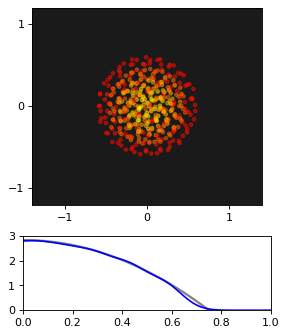

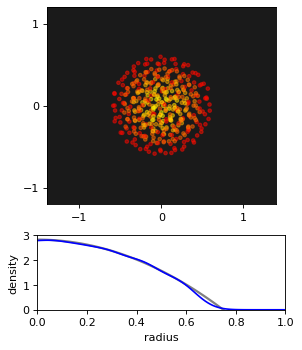

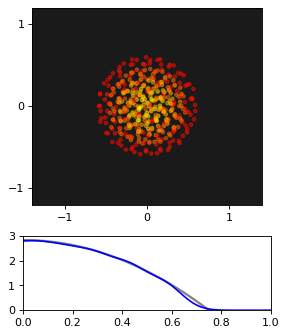

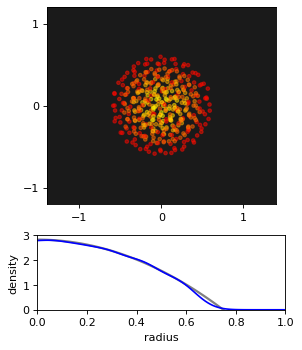

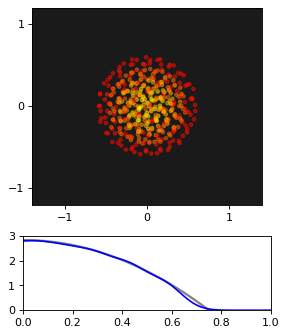

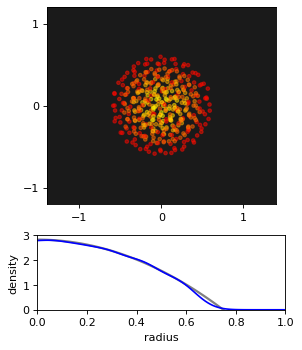

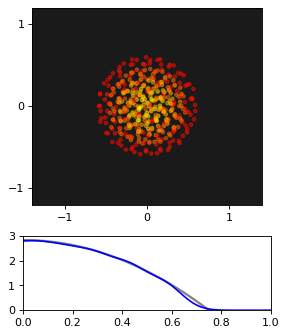

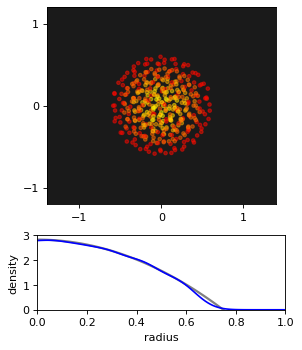

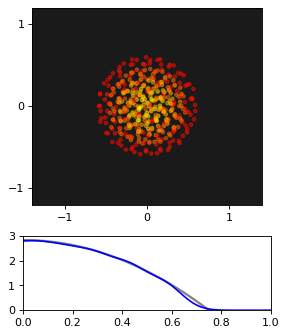

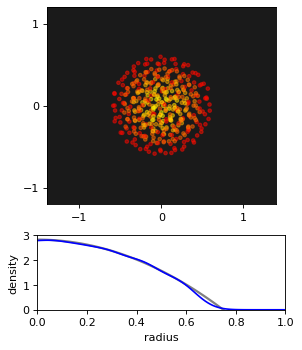

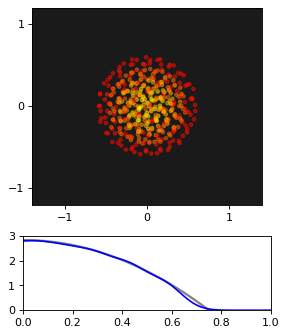

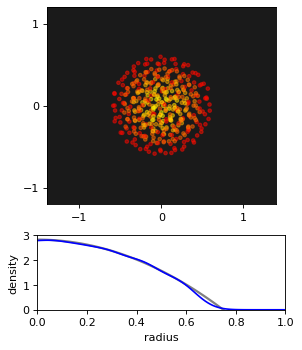

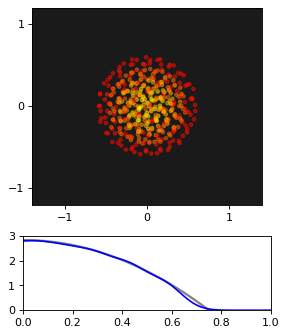

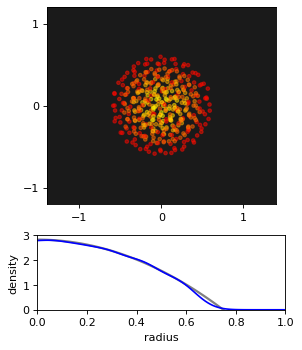

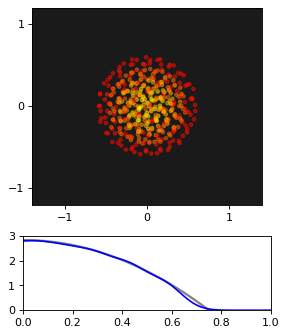

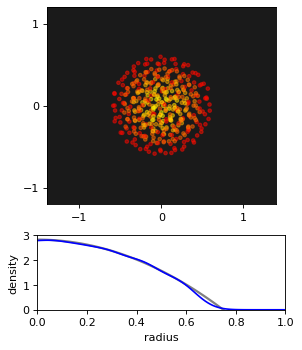

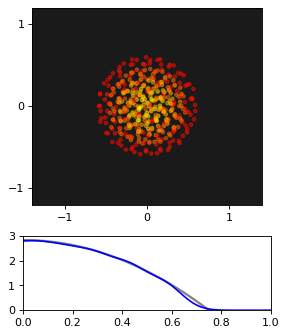

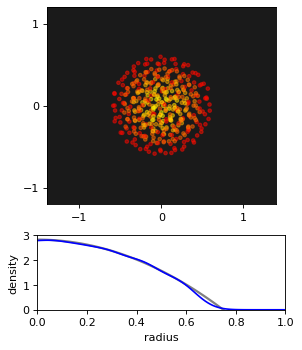

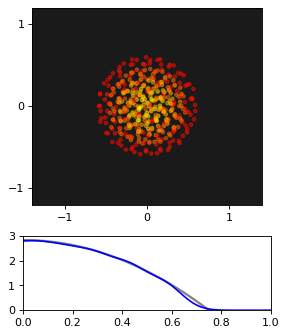

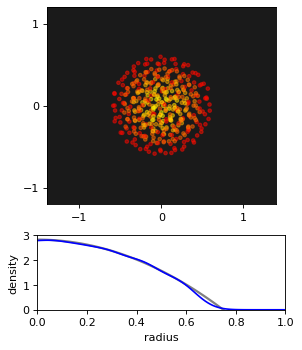

torch took on average 10.891854 s over 10 iterations


In [7]:
class Arg:
	def __init__(self, N=400, plot=False):
		self.N= N 
		self.plot = plot
		
	


def benchmark_jit(fn, i_count, args):
	total_time = 0
	first_run_time = 0
	for i in range(i_count):
		t1 = time_ns()
		fn(args)
		t2 = time_ns()
		time_passed = (t2 - t1)/1e9
		if i==0:
			first_run_time = time_passed
		else:
			total_time += time_passed

	return total_time / (i_count-1), first_run_time

def benchmark(fn, i_count, args):
	total_time = 0
	for i in range(i_count):
		t1 = time_ns()
		fn(args)
		t2 = time_ns()
		time_passed = (t2 - t1)/1e9
		total_time += time_passed

	return total_time / i_count

args = Arg(N=400,plot=False)

# avg_time = benchmark(run_normal, 10, args=args)
# print(f"cupy took on average {avg_time:02f} s over 50 iterations")

# avg_time, first_time = benchmark_jit(run_numba, 50, args=args)
# print(f"cython took on average {avg_time:02f} s over 50 iterations, first run took {first_time}")

# avg_time = benchmark(run_cupy, 50, args=args)
# print(f"cupy took on average {avg_time:02f} s over 50 iterations")

avg_time = benchmark(run_cython,10, args=args)
print(f"torch took on average {avg_time:02f} s over 10 iterations")

# avg_time = benchmark(run_torch,50, args=args)
# print(f"torch took on average {avg_time:02f} s over 50 iterations")
# Plain SPH code
# main took 6.0868 s
# Numba SPH code
# main took 5.6961 s
# Cython SPH code
# main took 18.8142 s
# GPU SPH code
# main took 1.3467 s

# Effect of increasing amount of nodes

# Lineprofiling

/home/sacation/miniconda3/envs/wsl/lib/python3.9/site-packages/line_profiler/line_profiler.py:75: UserWarning: Adding a function with a __wrapped__ attribute. You may want to profile the wrapped function by adding main.__wrapped__ instead.
  self.add_function(func)


main took 1.5959 s
Timer unit: 1e-09 s

Total time: 1.59599 s
File: /mnt/d/Projects/kth/hpc/HPC-SPH/profiling/profiling_tools.py
Function: measure_time at line 9

Line #      Hits         Time  Per Hit   % Time  Line Contents
     9                                               @wraps(fn)
    10                                               def measure_time(*args, **kwargs):
    11         1       1700.0   1700.0      0.0          t1 = timer()
    12         1 1595885484.0    2e+09    100.0          result = fn(*args, **kwargs)
    13         1       1600.0   1600.0      0.0          t2 = timer()
    14                                           
    15                                                   # Append durations to the correct list, in order to compute the average and especially std
    16         1       1200.0   1200.0      0.0          if "serial" in fn.__name__:
    17                                                       serial_durations.append((t2 - t1)/1e9)
    18       

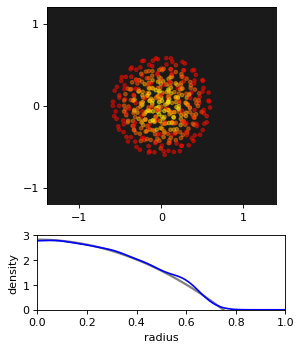

In [2]:
from line_profiler import LineProfiler
from sph_cupy import main, getAcc, gradW, getPairwiseSeparations

lp = LineProfiler()
lp.add_function(getAcc)
lp.add_function(gradW)
lp.add_function(getPairwiseSeparations)
wrapper = lp(main)
wrapper()
lp.print_stats()